# A demonstration of ChEMBL webresource client

ChEMBL webresource client is the official Python cliet library that helps access ChEMBL data. It provides a simple interface to the ChEMBL web services and allows to query the ChEMBL database and retrieve data in a programmatic way. Adapted from the official [demo](http://beta.mybinder.org/v2/gh/chembl/chembl_webresource_client/master?filepath=demo_wrc.ipynb) included in the repo of [`chembl_webresource_client`](https://github.com/chembl/chembl_webresource_client) (and its [later version](https://github.com/chembl/notebooks/blob/main/ChEMBL_webresource_client_examples.ipynb)), this jupyter notebook presents some more detailed examples of how to use the client library to access ChEMBL data. Additionally, here is the ChEMBL interface documentation: https://chembl.gitbook.io/chembl-interface-documentation

## 1. Available filters
ChEMBL webresource client provides a number of lookups for flexible quering of the database, making it filter and retrieve specific data. Here are some notes about each lookup type supported by ChEMBL:
  - `exact`: Matches an exact value, e.g., `name__exact='Aspirin'` would match if the name is exactly `'Aspirin'`.
  - `iexact`: Case-insensitive exact value, e.g., `name__iexact='aspirin'` would match if the name is `'aspirin'`, `'ASPIRIN'`, etc.
  - `contains`: Checks if a value contains the specified substring, e.g., `description__contains='pain'` would match if the description contains the substring `'pain'`.
  - `icontains`: Case-insensitive contains, e.g., `description__icontains='Pain'` would match if the description contains `'pain'`, `'Pain'`, etc.
  - `in`: Matches if the value is within a specified list, e.g., `id__in=[1, 2, 3]` would match if the id is 1, 2, or 3.
  - `gt`/`gte/lt/lte`: Greater than/greater than or equal to/less than/less than or equal to, e.g., `value__gt=10` would match if the value is greater than 10.
  - `startswith/endswith`: Matches if a value starts/ends with the specified substring, e.g., `name__startswith='Asp'` would match if the name starts with `'Asp'`.
  - `istartswith/iendswith`: Case-insensitive starts/ends with, e.g., `name__istartswith='asp'` would match if the name starts with `'asp'`, `'Asp'`, etc.
  - `range`: Matches if a value is within a specified range, e.g., `value__range=(1, 10)` would atch if the value is between 1 and 10 inclusive. 
  - `isnull`: Matches if a value is null, e.g., `date_isnull=True` would match if the date is null.
  - `regex`: Matches if a value matches the specified regular expression, e.g.,  `name__regex=r'^[A-Z]'` would match if the name starts with an uppercase letter.
  - `iregex`: Case-insensitive regular expression match, e.g., `name__iregex=r'^[a-z]'` would match if the name starts with a letter, regardless of case.
  - `search`: Full-text search, supported in som backends like PostgresSQL, e.g., `description__search='pain relief'` would match if the description matches the full-text search term `'pain relief'`.


## 2. The `only` operator
### 2.1. Introduction
The `only` method in the ChEMBL webresrouce client is used to limit the results of a query to a specific set of fields. The `only` method takes a single argument, which is a list of fields that one wants to include in the result. When one uses the `only` method to specify a subset of fields, the API will return only those fields, rather than the entire dataset. This reduces the amount of data being transmitted over the network, thus saving bandwidth and making the API call/query faster.

### 2.2. Example

In [1]:
from chembl_webresource_client.new_client import new_client

# Create a client for molecules
molecule = new_client.molecule

mol_1 = molecule.get('CHEMBL25')
mol_2 = molecule.filter(chembl_id='CHEMBL25').only(['chembl_id', 'molecule_properties', 'molecule_structures'])
mol_3 = molecule.filter(chembl_id='CHEMBL25')

- As can be checked, `mol_1` is a dictionary containing 36 keys relevant to the compound aspirin, including `'atc_classifications'`, `'availability_type'`, ... `'molecule_properties'`, `'molecule_structures'`, ... etc.

In [2]:
mol_1.keys()

dict_keys(['atc_classifications', 'availability_type', 'biotherapeutic', 'black_box_warning', 'chebi_par_id', 'chemical_probe', 'chirality', 'cross_references', 'dosed_ingredient', 'first_approval', 'first_in_class', 'helm_notation', 'indication_class', 'inorganic_flag', 'max_phase', 'molecule_chembl_id', 'molecule_hierarchy', 'molecule_properties', 'molecule_structures', 'molecule_synonyms', 'molecule_type', 'natural_product', 'oral', 'orphan', 'parenteral', 'polymer_flag', 'pref_name', 'prodrug', 'structure_type', 'therapeutic_flag', 'topical', 'usan_stem', 'usan_stem_definition', 'usan_substem', 'usan_year', 'withdrawn_flag'])

- On the other hand, `mol_2` is an object of `chembl_webresource_client.query_set.QuerySet`. It can be indexed and has only one element in this case. Specifically, `mol_2[0]` is a dictionary containing only two keys (`'molecule_properties'` and `'molecule_structures'` for the same compound aspirin.)

In [3]:
type(mol_2)

chembl_webresource_client.query_set.QuerySet

In [4]:
mol_2[0]

{'molecule_properties': {'alogp': '1.31',
  'aromatic_rings': 1,
  'cx_logd': '-2.16',
  'cx_logp': '1.24',
  'cx_most_apka': '3.41',
  'cx_most_bpka': None,
  'full_molformula': 'C9H8O4',
  'full_mwt': '180.16',
  'hba': 3,
  'hba_lipinski': 4,
  'hbd': 1,
  'hbd_lipinski': 1,
  'heavy_atoms': 13,
  'molecular_species': 'ACID',
  'mw_freebase': '180.16',
  'mw_monoisotopic': '180.0423',
  'np_likeness_score': '0.12',
  'num_lipinski_ro5_violations': 0,
  'num_ro5_violations': 0,
  'psa': '63.60',
  'qed_weighted': '0.55',
  'ro3_pass': 'N',
  'rtb': 2},
 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O',
  'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   19.8052   -4.2758    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   19.8040   -5.0953    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5121   -5.5043    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2217   -5.0948    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  

- `mol_3` is also an object of `chembl_webresource_client.query_set.QuerySet` and also has only one element, which is a dictionary for the compound aspirin. However, since the `only` method was not used. `mol_3[0]` is equivalent to `mol_1`.

In [5]:
mol_3[0] == mol_1

True

- So for `mol_1` and `mol_3`, the query retrieved all information about the molecule with ChEMBL ID `CHEMBL25`, which can include a lot of data. On the other hand, for `mol_2`, the query was limited to only return the `chembl_id`, `molecule_properties`, and `molecule_structures` fields for the molecule with ChEMBL ID `CHEMBL25`. This reduces the amount of data returned and can speed up the query.

In [6]:
A = molecule.filter(chembl_id='CHEMBL25').only(['chembl_id' 'molecule_properties', 'molecule_structures'])
B = molecule.filter(chembl_id='CHEMBL25').only([ 'molecule_properties', 'molecule_structures'])

print(f'keys of A: {A[0].keys()}\nkeys of B: {B[0].keys()}')
print('Keys of A and B are the same: ', A[0].keys() == B[0].keys())
print('Values of A and B are the same: ', A[0] == B[0])
print(A == B)

keys of A: dict_keys(['molecule_properties', 'molecule_structures'])
keys of B: dict_keys(['molecule_properties', 'molecule_structures'])
Keys of A and B are the same:  True
Values of A and B are the same:  True
False


- As shown above, `A` and `B` are essentially the same in terms of their keys and values, though `A==B` still returned `False`. This is because they are indeed different queries. In fact, even `a==b` below returns `False`.

In [7]:
a = molecule.filter(chembl_id='CHEMBL25').only(['molecule_properties', 'molecule_structures'])
b = molecule.filter(chembl_id='CHEMBL25').only(['molecule_properties', 'molecule_structures'])
a == b

False

- Note that specified fields have to exist in the endpoint against which only is executed.
  - An API endpoint is a specific URL or address at which a service can be accessed by applications to perform operations such as fetching data or sending data. Think of it as a specific function or resource you can interact with through a URL. In simpler terms, an API endpoint is like a door through which you can request specific information from a database or service.
  - The molecule endpoint might be something like https://www.ebi.ac.uk/chembl/api/data/molecule. Each endpoint corresponds to a particular type of data or functionality provided by the API.
  - The example above used the method `molecule` to create a client. There are a lot of other methods one can use, which can be checked by the following code:

In [8]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'chembl_release', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


For example, one can create a client using `activity`:

In [9]:
activity = new_client.activity
activities = activity.filter(molecule_chembl_id='CHEMBL25').only(['activity_id', 'assay_chembl_id', 'standard_value', 'standard_units', 'standard_type'])
print(activities)

[{'activity_id': 42173, 'assay_chembl_id': 'CHEMBL702885', 'standard_type': "Log K'", 'standard_units': None, 'standard_value': '1.39', 'type': "Log K'", 'units': None, 'value': '1.39'}, {'activity_id': 81965, 'assay_chembl_id': 'CHEMBL771355', 'standard_type': 'Activity', 'standard_units': '%', 'standard_value': '100.0', 'type': 'Activity', 'units': '%', 'value': '100.0'}, {'activity_id': 81966, 'assay_chembl_id': 'CHEMBL780106', 'standard_type': 'ED25', 'standard_units': 'uM kg-1', 'standard_value': '402.0', 'type': 'ED25', 'units': 'uM kg-1', 'value': '402.0'}, {'activity_id': 88326, 'assay_chembl_id': 'CHEMBL762032', 'standard_type': 'IC50', 'standard_units': 'nM', 'standard_value': '34600.0', 'type': 'IC50', 'units': 'uM', 'value': '34.6'}, '...(remaining elements truncated)...']


or using `target`:

In [10]:
target = new_client.target
target_info = target.filter(target_chembl_id='CHEMBL2093871').only(['target_chembl_id', 'pref_name', 'organism', 'target_type', 'species_group_flag'])
print(target_info)

[{'organism': 'Rattus norvegicus', 'pref_name': 'Glutamate receptor ionotropic, AMPA', 'species_group_flag': False, 'target_chembl_id': 'CHEMBL2093871', 'target_type': 'PROTEIN COMPLEX GROUP'}]


For more examples, please refer to the next section.

### 2.3. Limitations
- **Nested fields**: Specifying nested fields won't work as intended, as the `only` method ignores nested fields. The parent field will be returned instead. For instance `only(['molecule_proper__alogp'])` is treated as `only(['molecule_properties'])`.
- **Many-to-many relationship**: For many-to-many relationship, `only` won't optimize SQL joins. This means it won't reduce the complexity of retrieving related data in such relationships.  

### 2.4. Benefits
By using `only`, you can significantly reduce the payload size and improve the performance of your API calls, esepcially when you only need a few fields from a potentially large dataset. This is particularly useful in scenarios where bandwidth and response time are critical. (Behind the scene, the API logic will also check if any SQL joins are necessary to return the specified field and exclude unnecessary joins with critically improves performance.)

### 2.5. Complementary notes
#### 2.5.1. What are SQL joins?
(Notes taken from the response by ChatGPT-4o.)
- SQL is a standard language used to communicate with databases. It allows you to create, read, update, and delete data in a database. In SQL, a join is a way to combine rows from two or more tables based on a related column between them. 
- Types of SQL Joins:
  - `INNER JOIN`: Returns only the rows that have matching values in both tables.
  - `LEFT JOIN` (or `LEFT OUTER JOIN`): Returns all rows from the left table, and the matched rows from the right table. If no match, NULL values are returned for columns from the right table.
  - `RIGHT JOIN` (or `RIGHT OUTER JOIN`): Returns all rows from the right table, and the matched rows from the left table. If no match, NULL values are returned for columns from the left table.
  - `FULL JOIN` (or `FULL OUTER JOIN`): Returns all rows when there is a match in either left or right table. Rows that do not have a match in either table are also included, with NULLs in the columns of the non-matching table.
- Example
  - Imagine you have two tables in a database.
    - Table 1: Molecules 

      | chembl_id | name | 
      | :--------: | :--------: |
      | CHEMBL25 | Aspirin     | 
      | CHEMBL26 | Paracetamol     | 
    - Table 2: Molecule Properties
  
      | chembl_id |   property_name  | property_value |
      |:---------:|:----------------:|:--------------:|
      |  CHEMBL25 |       logP       |       1.2      |
      |  CHEMBL25 | molecular_weight |     180.16     |
      |  CHEMBL26 |       logP       |       0.5      |
      | CHEMBL26  | molecular_weight | 151.17         |
  - Join example
    - You want to retrieve the molecule name and its logP value.
    - The common column between the two tables is `chembl_id`. 
  - SQL query
    ```sql
    SELECT molecule.name, molecule_properties.property_value AS logP
    FROM molecule
    INNER JOIN molecule_properties
    ON molecule.chembl_id = molecule_properties.chembl_id
    WHERE molecule_properties.property_name = 'logP';
    ```
  - Result

    |     name    | logP |
    |:-----------:|:----:|
    |   Aspirin   |  1.2 |
    | Paracetamol |  0.5 |
  - In this query:
    - `INNER JOIN` is used to combine rows from the molecule table and molecule_properties table where the `chembl_id` matches.
    - The `WHERE` clause filters the properties to only get the logP values.
  - When the API needs to fetch data that resides in multiple related tables, it may perform joins behind the scenes to combine the necessary data into a single response. By using the only method, you help the API understand which specific fields you need, allowing it to exclude unnecessary joins and optimize the query.

#### 2.5.2. What are many-to-many relationships?
Many-to-many relationships are a common concept in database design where a record in one table can be associated with multiple records in another table, and vice versa. To manage many-to-many relationships, a third table, often called a "junction table" or "join table," is used to link the two related tables. Below is an example scenario.
  - Consider a database where we have three tables: "Compounds", "Assays" and "Targets". As shown below, the columns of the table create a many-to-many relationship between tables. Specifically
    - Compounds:

      | chembl_id | molecule_name |
      |:---------:|:-------------:|
      |  CHEMBL25 |    Aspirin    |
      |  CHEMBL26 |  Paracetamol  |
    - Assays:

      | assay_id |    assay_description   |
      |:--------:|:----------------------:|
      |    A1    | Inhibition of enzyme X |
      |    A2    |  Binding to receptor Y |
    - Targets:

      | target_id | target_name |
      |:---------:|:-----------:|
      |     T1    |   Enzyme X  |
      |     T2    |  Receptor Y |
  - Junction tables
    - The junction table for the compound-assay relationship

      | chembl_id | assay_id |
      |:---------:|:--------:|
      |  CHEMBL25 |    A1    |
      |  CHEMBL25 |    A2    |
      |  CHEMBL26 |    A1    |
    - The junction table for the assay-target relationship

      | assay_id | target_id |
      |:--------:|:---------:|
      |    A1    |     T1    |
      |    A2    |     T2    |
    - SQL joins for many-to-many relationships 
      To retrieve the list of compounds, their assays, and the associated targets, one can use SQL joins so that the following table is generated.
      
      | molecule_name |    assay_description   | target_name |
      |:-------------:|:----------------------:|:-----------:|
      |    Aspirin    | Inhibition of enzyme X |   Enzyme X  |
      |    Aspirin    |  Binding to receptor Y |  Receptor Y |
      |  Paracetamol  | Inhibition of enzyme X |   Enzyme X  |


## 3. Examples of retriving data from ChEMBL

### 3.1. Compounds
Compounds in ChEMBL usually have associated bioactivity data. For example, the activity of a compound may have been measured in an experiment against a particular target and results in a certain IC50 value that has been published in the scientific literature. Compounds records may be retrieved in a number of ways, such as a lookup of an individual compound using various identifiers (with the `'molecule'` endpoint) or by seraching for compounds via the `'similarity'` endpoint. Below we present various examples.

#### 3.1.1. Get a molecule by its preferred name (`pref_name`)

In [11]:
molecule.filter(pref_name__iexact='aspirin').only('molecule_chembl_id')

[{'molecule_chembl_id': 'CHEMBL25'}]

#### 3.1.2. Get a molecule by its synonyms
Note that the `'molecule_synonym'` field is nested within the `'molecule_synonyms'` field, hence the first double underscore. (That is, `'molecule_synonyms'` corresponds to a list of dictionaries, each containing a key `'molecule_synonym'`.)

In [12]:
molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')

[{'molecule_chembl_id': 'CHEMBL192'}, {'molecule_chembl_id': 'CHEMBL1737'}]

#### 3.1.3. Get a single molecule by ChEMBL ID
Note that one can use `molecule.get('CHEMBL25')` to print all fields.

In [13]:
molecule.filter(chembl_id='CHEMBL25').only(['molecule_chembl_id', 'pref_name', 'full_molformula'])

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}]

#### 3.1.4. Get a few molecules by their ChEMBL IDs
Here we use the double underscore followed by the `in` keyword to find a list of `'molecule_chembl_id'`'s.

In [14]:
molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name', 'full_molformula'])

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

#### 3.1.5. Get a single molecule by standard InChI Key
In the example below, ehe value of `molecule_structures` is a dictionary containing keys including `'canonical_smiles'`, `'molfile'`, `'standard_inchi'`, `'standard_inchi_key'`, etc. 

In [15]:
molecule.filter(molecule_structures__standard_inchi_key='BSYNRYMUTXBXSQ-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name'])

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}]

#### 3.1.6. Find compounds similar to a given SMILES query with similarity > 70%

In [16]:
import pandas as pd
similarity = new_client.similarity
mols = similarity.filter(smiles="CC(=O)Oc1ccccc1C(=O)O", similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
pd.DataFrame(mols)

,molecule_chembl_id,pref_name,similarity
0,CHEMBL2296002,None,100
1,CHEMBL1697753,ASPIRIN DL-LYSINE,100
2,CHEMBL25,ASPIRIN,100
3,CHEMBL3833404,CARBASPIRIN,88.8888895511627197265625
4,CHEMBL3833325,CARBASPIRIN CALCIUM,88.8888895511627197265625
5,CHEMBL350343,DIPLOSALSALATE,85.7142865657806396484375
6,CHEMBL5282669,None,74.0740716457366943359375
7,CHEMBL4515737,None,70.3703701496124267578125
8,CHEMBL1451173,DIPYROCETYL,69.9999988079071044921875


#### 3.1.7. Find compounds similar to aspirin (CHEMBL25) with similarity > 70%
The output here should be the same as the one in section 3.1.6. since `CC(=O)Oc1ccccc1C(=O)O` used in section 3.1.6. is the canonical SMILES of aspirin.

In [17]:
similarity = new_client.similarity
mols = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
pd.DataFrame(mols)

,molecule_chembl_id,pref_name,similarity
0,CHEMBL2296002,None,100
1,CHEMBL1697753,ASPIRIN DL-LYSINE,100
2,CHEMBL3833404,CARBASPIRIN,88.8888895511627197265625
3,CHEMBL3833325,CARBASPIRIN CALCIUM,88.8888895511627197265625
4,CHEMBL350343,DIPLOSALSALATE,85.7142865657806396484375
5,CHEMBL5282669,None,74.0740716457366943359375
6,CHEMBL4515737,None,70.3703701496124267578125
7,CHEMBL1451173,DIPYROCETYL,69.9999988079071044921875


#### 3.1.8. Find compounds with the same connectivity

In [18]:
molecule = new_client.molecule
mols = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name'])
pd.DataFrame(mols)

,molecule_chembl_id,pref_name
0,CHEMBL1431,METFORMIN
1,CHEMBL1703,METFORMIN HYDROCHLORIDE
2,CHEMBL3094198,None


#### 3.1.9. Get all compounds with molecular weight < 300 Da
- Note the double underscore to access the `mw_freebase` database field is nested within the field `molecule_properties`.
- `mw_freebase` refers to the molecular weight of the compound in its freebase form, i.e., without any counterions or salts. On the other hand, the filed `full_mwt` is the molecular weight of the compound including any counterions or salts.
- Here, we additionally used `order_by` to sort the results.

In [19]:
molecule = new_client.molecule
mols = molecule.filter(molecule_properties__mw_freebase__lte=300).order_by('molecule_properties__full_mwt').only(['molecule_chembl_id', 'pref_name', 'full_mwt'])
print(f'Result: {len(mols)} compounds have a molecular weight < 300 Da.')

Result: 427124 compounds have a molecular weight < 300 Da.


#### 3.1.10. Get all biotherapeutic molecules

In [20]:
molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
print(f'Result: There are {len(biotherapeutics)} biotherapeutic molecules.')

Result: There are 23734 biotherapeutic molecules.


#### 3.1.11. Get molecules with molecular weight <= 300 AND pref_name ending with nib

Note that multiple `filter` conditions can be combined into a list separated by `,`. Equivalently, one can use the filter method multiple times, i.e., `light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300).filter(pref_name__iendswith="nib") ...`.

In [21]:
molecule = new_client.molecule
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300, pref_name__iendswith="nib").only(['molecule_chembl_id', 'pref_name'])
pd.DataFrame(light_nib_molecules)

,molecule_chembl_id,pref_name
0,CHEMBL276711,SEMAXANIB
1,CHEMBL4085457,RITLECITINIB
2,CHEMBL4594348,ELSUBRUTINIB


#### 3.1.12. Get all molecules in ChEMBL with no Rule-of-Five violations
`num_ro5_violations` is the number of Lipinski's Rule of Five violations for the compound. Lipinski's Rule of Five is a rule of thumb used to evaluate the drug-likeness of a compound based on its physicochemical properties. A compound is considered more likely to be orally bioavailable if it has fewer than two violations of Lipinski's Rule of Five. The rule states that a compound is more likely to be orally bioavailable if it satisfies the following criteria. Note that all numbers are multiples of five, which is the origin of the rule's name.
  - A molecular mass less than 500 daltons
  - A calculated octanol-water partition coefficient (Clog P) that does not exceed 5
  - No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
  - No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)

In [22]:
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
print("Result: There are {len(no_violations)} compounds that do not violate any Lipinski's Rule of Five")

Result: There are {len(no_violations)} compounds that do not violate any Lipinski's Rule of Five


#### 3.1.13. Showing the structure of a molecule using the `image` endpoint

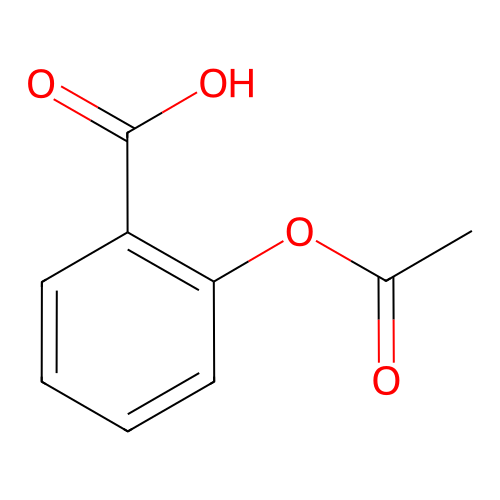

In [23]:
from IPython.display import SVG
image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

### 3.2. Drugs
- By contrast to compounds, marketed drugs and clinical candidates in ChEMBL normally have curated information for their synonyms, disease indication, mechanism of action, safety warnings etc, and do not necessarily have to have associated measured bioactivity data.
- Clinical candidates are drugs that are progressing through Phases 1, 2 and 3 of the drug discovery pipeline, while approved drugs are considered to be Phase 4 (i.e., `max_phase=4`). Check [this page](https://chembl.gitbook.io/chembl-interface-documentation/frequently-asked-questions/drug-and-compound-questions#what-is-max-phase) for more information.
- Note that the data in the drugs API endpoint is aggregated onto the parent drug form within each compound family.

#### 3.2.1. Filter drugs by approval year and name
`usan_stem` is the United States Adopted Name (USAN) stem of the compound. The USAN is a unique name assigned to a compound by the United States Adopted Names Council. The USAN stem is the common part of the USAN name shared by a group of related compounds.

In [24]:
drug = new_client.drug
drugs = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin").only(['development_phase', 'molecule_chembl_id', 'usan_stem_definition'])
pd.DataFrame(drugs)

,applicants,atc_code_description,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition
0,None,None,CHEMBL611,None,None,-azosin,antihypertensives (prazosin type)
1,None,None,CHEMBL707,None,None,-azosin,antihypertensives (prazosin type)


#### 3.2.2. Find compounds that have been recently approved as marketed drugs and are immunosupressants
Here we use the `molecule` endpoint to find compounds (an alternative would be to use the `drugs` endpoint). The `atc_classifications__level2` field refers to the Anatomical Therapeutic Chemical (ATC) classification system, which is used for the classification of drugs. The ATC system divide drugs into different groups according to the organ or system on which they act and their therapeutic, pharmacological, and chemical properties. The ATC classification system is hierarchical and contains of five levels:
  - Level 1: Indicates the anatomical main group (e.g., A for Alimentary tract and metabolism).
  - Level 2: Indicates the therapeutic main group (e.g., L04 for Immunosuppressants).
  - Level 3: Indicates the pharmacological subgroup.
  - Level 4: Indicates the chemical subgroup.
  - Level 5: Indicates the chemical substance.

In [25]:
approved_drugs = molecule.filter(max_phase=4,  # approved drugs only
                                atc_classifications__level2='L04',  # ATC classification as Immunosupressants
                                first_approval__gte=2020,  # first_approval after 2020
                                ).order_by('first_approval').only(['atc_classifications', 'first_approval', 'pref_name', 'molecule_type', 'molecule_chembl_id'])
pd.DataFrame(approved_drugs)

,atc_classifications,first_approval,molecule_chembl_id,molecule_type,pref_name
0,[L04AA53],2020,CHEMBL1743079,Antibody,TEPROTUMUMAB
1,[L04AA47],2020,CHEMBL2109334,Antibody,INEBILIZUMAB
2,[L04AA45],2020,CHEMBL3301607,Small molecule,FILGOTINIB
3,[L04AA38],2020,CHEMBL3707247,Small molecule,OZANIMOD
4,[L04AC19],2020,CHEMBL3833307,Antibody,SATRALIZUMAB
5,[L04AA41],2020,CHEMBL4297981,Enzyme,IMLIFIDASE
6,[L04AA50],2021,CHEMBL1096146,Small molecule,PONESIMOD
7,[L04AA48],2021,CHEMBL2005186,Small molecule,BELUMOSUDIL
8,[L04AA51],2021,CHEMBL2364653,Antibody,ANIFROLUMAB
9,[L04AA59],2021,CHEMBL3989871,Small molecule,AVACOPAN


#### 3.2.3. Get Phase 3 clinical candidates for lung cancer, and examine their molecular properties
- First, we use the `drug_indication` API endpoint, specifying `max_phase_for_ind` to be 3 (i.e., clinical candidates in Phase 3 progressing through the drug discovery pipeline for lung cancer).
- Then, we feed the results into the `molecule` API endpoint to extract their molecular properties.
- `efo_term__icontains` means that the value of the key `'efo_term'` in the `efo_info` dictionary should contain a certain substring in a case-insensitive manner. The `efo_info` field is a dictionary containing information about the Experimental Factor Ontology (EFO) term associated with the compound. For more information about EFO, please visit this [page](https://www.ebi.ac.uk/efo/faq.html#queryingefo).
- Notably, `max_phase` works with the `molecule` endpoint, while `max_phase_for_ind` works with the `drug_indication` endpoint.

In [26]:
drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA", max_phase_for_ind = 3)
lung_cancer_phase3 = molecules.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind]).only(['molecule_chembl_id','molecule_properties'])
lung_cancer_phase3 = pd.DataFrame(lung_cancer_phase3)
lung_cancer_phase3.head()

,molecule_chembl_id,molecule_properties
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log..."
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log..."
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log..."
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log..."
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log..."


Here we add a new column `mw_freebase` to `lung_cancer_phase3.head()`, where the data is taken from the nested field `molecule_properties`.

In [27]:
lung_cancer_phase3['mw_freebase'] = lung_cancer_phase3.loc[lung_cancer_phase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['mw_freebase']) # This is the mwt of the parent compound
lung_cancer_phase3.head()

,molecule_chembl_id,molecule_properties,mw_freebase
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log...",180.16
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log...",300.44
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log...",232.28
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log...",586.69
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log...",421.45


#### 3.2.4. What is the (therapeutic) mechanism of action for Sodium channel protein type V alpha subunit? For which drugs?

In [28]:
mechanism = new_client.mechanism
res = mechanism.filter(target_chembl_id='CHEMBL1980' # Sodium channel protein type V alpha subunit target
                      ).only(['action_type','max_phase','mechanism_comment','mechanism_of_action','molecule_chembl_id', 'target_chembl_id'])
pd.DataFrame(res)

,action_type,max_phase,mechanism_comment,mechanism_of_action,molecule_chembl_id,target_chembl_id
0,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1200822,CHEMBL1980
1,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1200612,CHEMBL1980
2,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1404,CHEMBL1980
3,BLOCKER,2,None,Sodium channel protein type V alpha subunit bl...,CHEMBL3545040,CHEMBL1980
4,BLOCKER,2,"L-type calcium channel (CACNA1C, CACNA1D, CACN...",Sodium channel protein type V alpha subunit bl...,CHEMBL3545169,CHEMBL1980
5,BLOCKER,4,Prenylamine is a potent sodium channel (NaCh) ...,Sodium channel protein type V alpha subunit bl...,CHEMBL24072,CHEMBL1980
6,BLOCKER,4,Also partially blocks the hERG channel.,Sodium channel protein type V alpha subunit bl...,CHEMBL2107383,CHEMBL1980


#### 3.2.5. Find marketed drugs that have been subsequently withdrawn for concerns in psychiatric toxicity

In [29]:
drug_warning = new_client.drug_warning
res = drug_warning.filter(warning_type='Withdrawn', warning_class='psychiatric toxicity').only(['efo_id', 'efo_term', 'molecule_chembl_id', 'warning_year'])
pd.DataFrame(res).head()

,efo_id,efo_term,molecule_chembl_id,warning_year
0,EFO:0020909,impaired psychomotor skills,CHEMBL1233,2007
1,HP:0011446,Abnormality of higher mental function,CHEMBL254857,1990
2,EFO:0003761,unipolar depression,CHEMBL646,1991
3,HP:0011446,Abnormality of higher mental function,CHEMBL3188576,1970
4,EFO:0003761,unipolar depression,CHEMBL111,2008


#### 3.2.6. Find FDA drugs that carry a black box warning for cardiotoxicity

In [30]:
drug_warning = new_client.drug_warning
res = drug_warning.filter(warning_class__icontains='cardio', warning_type='Black Box Warning').only(['molecule_chembl_id'])
pd.DataFrame(res).head()

,molecule_chembl_id
0,CHEMBL270190
1,CHEMBL1083993
2,CHEMBL501
3,CHEMBL1200978
4,CHEMBL24


### 3.3. Targets
#### 3.3.1. Find a target by gene name

In [31]:
target = new_client.target
gene_name = 'BRD4'
res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
pd.DataFrame(res)

,organism,pref_name,target_type
0,Homo sapiens,Bromodomain-containing protein 4,SINGLE PROTEIN
1,Mus musculus,Bromodomain-containing protein 4,SINGLE PROTEIN
2,Homo sapiens,BRD4/HDAC1,PROTEIN COMPLEX
3,Homo sapiens,Cereblon/Cullin-4A/Bromodomain-containing prot...,PROTEIN-PROTEIN INTERACTION
4,Homo sapiens,Cereblon/Bromodomain-containing protein 4,PROTEIN-PROTEIN INTERACTION
5,Homo sapiens,von Hippel-Lindau disease tumor suppressor/Bro...,PROTEIN-PROTEIN INTERACTION
6,Homo sapiens,Cereblon/DNA damage-binding protein 1/Bromodom...,PROTEIN-PROTEIN INTERACTION
7,Homo sapiens,von Hippel-Lindau disease tumor suppressor/Elo...,PROTEIN-PROTEIN INTERACTION
8,Homo sapiens,Bromodomain and extra-terminal motif (BET),PROTEIN FAMILY
9,Homo sapiens,BRD4/E3 ubiquitin-protein ligase Mdm2,PROTEIN-PROTEIN INTERACTION


#### 3.3.2. Find a protein target using its UniProt ID

In [32]:
target = new_client.target
uniprot_id = 'P35916' # Vascular endothelial growth factor receptor 3; UniProt accession P35916
pd.DataFrame(target.filter(target_components__accession=uniprot_id))

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'FLT4', 'xref_name': None, 'xref_...",Homo sapiens,Vascular endothelial growth factor receptor 3,False,CHEMBL1955,"[{'accession': 'P35916', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Vascular endothelial growth factor receptor,False,CHEMBL2095227,"[{'accession': 'P17948', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Homo sapiens,Vascular endothelial growth factor receptor 2 ...,False,CHEMBL2111409,"[{'accession': 'P35916', 'component_descriptio...",SELECTIVITY GROUP,9606
3,[],Homo sapiens,Focal adhesion kinase 1/vascular endothelial g...,False,CHEMBL3301389,"[{'accession': 'P35916', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


#### 3.3.3. Which species have available data in ChEMBL for cannabinoid receptor target(s)? What target types are they?

In [33]:
target = new_client.target
protein_name = 'cannabinoid' 
res = target.filter(pref_name__icontains=protein_name).only(['organism','pref_name','target_chembl_id','target_type']).order_by(['pref_name','organism'])

pd.DataFrame(res)

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Cannabinoid CB1 receptor,CHEMBL218,SINGLE PROTEIN
1,Mus musculus,Cannabinoid CB1 receptor,CHEMBL3037,SINGLE PROTEIN
2,Rattus norvegicus,Cannabinoid CB1 receptor,CHEMBL3571,SINGLE PROTEIN
3,Homo sapiens,Cannabinoid CB1 receptor/orexin receptor 1 com...,CHEMBL3301387,PROTEIN COMPLEX
4,Homo sapiens,Cannabinoid CB2 receptor,CHEMBL253,SINGLE PROTEIN
5,Mus musculus,Cannabinoid CB2 receptor,CHEMBL5373,SINGLE PROTEIN
6,Rattus norvegicus,Cannabinoid CB2 receptor,CHEMBL2470,SINGLE PROTEIN
7,Homo sapiens,Cannabinoid receptor,CHEMBL2096981,PROTEIN FAMILY
8,Mus musculus,Cannabinoid receptor,CHEMBL2111415,PROTEIN FAMILY
9,Rattus norvegicus,Cannabinoid receptor,CHEMBL2111385,PROTEIN FAMILY


#### 3.3.4. What does the protein classification look like for chemokine receptor targets?

In [34]:
protein_class = new_client.protein_classification
pd.DataFrame(protein_class.filter(l4__icontains='chemokine receptor')).head()

,class_level,definition,parent_id,pref_name,protein_class_desc,protein_class_id,replaced_by,short_name,sort_order
0,0,Root of the ChEMBL protein family classification,NaN,Protein class,protein class,0,None,Protein class,NaN
1,1,Biological molecules that possess catalytic ac...,0.0,Enzyme,enzyme,1,None,Enzyme,1.0
2,1,"Surface ligands, usually glycoproteins, that m...",0.0,Adhesion,adhesion,2,None,Adhesion,6.0
3,1,None,0.0,Secreted protein,secreted,3,None,Secreted,9.0
4,1,None,0.0,Structural protein,structural,4,None,Structural,10.0


### 3.4. Activities
The `activitity` API endpoint provides bioactivity data for compounds that have been measured against target(s) in an assay.

#### 3.4.1. Get all IC50 activities related to the hERG target

In [40]:
target = new_client.target
activity = new_client.activity
herg = target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")
print(f'Result: {len(herg_activities)} activities for hERG target')
print('For example, the first activity is as follows:')
herg_activities[0]

Result: 15530 activities for hERG target
For example, the first activity is as follows:


{'action_type': None,
 'activity_comment': None,
 'activity_id': 305156,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL841079',
 'assay_description': 'Inhibition of hERG currents Kv11.1',
 'assay_type': 'T',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000019',
 'bao_label': 'assay format',
 'canonical_smiles': 'O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc23)CC1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1134478',
 'document_journal': 'J Med Chem',
 'document_year': 2001,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL12713',
 'molecule_pref_name': 'SERTINDOLE',
 'parent_molecule_chembl_id': 'CHEMBL12713',
 'pchembl_value': '7.85',
 'potential_duplicate': 0,
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar',
 'record_id': 71623,
 'relation': '=',
 'src_id': 1,
 'standard_flag': 1,
 'standard_relation': '=',
 'standard_text_va

#### 3.4.2. Get all activities for a specific target with assay type B (binding)

In [37]:
activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL3938', assay_type='B')
print(f'Result: {len(res)} activities were found for target CHEMBL3938 with assay type B')
print('For example, the first activity has the following properties:')
res[0]

Result: 910 activities were found for target CHEMBL3938 with assay type B
For example, the first activity has the following properties:


{'action_type': None,
 'activity_comment': 'Not Active',
 'activity_id': 1650747,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL860783',
 'assay_description': 'Average Binding Constant for STK16; NA=Not Active at 10 uM',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000034',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'canonical_smiles': 'CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1144455',
 'document_journal': 'Nat Biotechnol',
 'document_year': 2005,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL554',
 'molecule_pref_name': 'LAPATINIB',
 'parent_molecule_chembl_id': 'CHEMBL554',
 'pchembl_value': None,
 'potential_duplicate': 0,
 'qudt_units': None,
 'record_id': 405809,
 'relation': None,
 'src_id': 1,
 'standard_flag': 0,
 'standard_relation': None,

#### 3.4.3. Get all activities with a pChEMBL value for Aspirin
The pChEMBL value is a standardized metric used in cheminformatics to compare the potency of different compounds. It is derived from various biological assay measurements such as IC50, EC50, Ki, and Kd values. The pChEMBL value provides a consistent scale for evaluating compound potency, facilitating easier comparison across different datasets and experiments. As an example, an IC50 measurement of 1 nM would have a pChEMBL value of 9. pChEMBL is defined as: -Log(molar IC50, XC50, EC50, AC50, Ki, Kd or Potency).

In [41]:
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)

print(f'Result: {len(res)} activities were found for molecule CHEMBL25 with a pChEMBL value')

Result: 150 activities were found for molecule CHEMBL25 with a pChEMBL value


### 3.5. Assays
#### 3.5.1. Search for ADMET-related inhibitor assays (assay type A) measured in Rat

In [44]:
assay = new_client.assay
res = assay.filter(description__icontains='inhibit', assay_type='A', assay_organism='Rattus norvegicus').only(['assay_chembl_id','assay_organism','description'])
pd.DataFrame(res).head()

,assay_chembl_id,assay_organism,description
0,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
1,CHEMBL615148,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 16-...
2,CHEMBL615199,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 2-a...
3,CHEMBL883800,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
4,CHEMBL618439,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...


#### 3.5.2 Find assays that assess nephrotoxicity (kidney toxicity)

In [45]:
assay = new_client.assay
res = assay.filter(description__iregex='nephrotoxicity|renal toxicity').only(['assay_chembl_id','assay_organism','description'])
pd.DataFrame(res).head()

,assay_chembl_id,assay_organism,description
0,CHEMBL730330,Mus musculus,Nephrotoxicity upon intragastric administratio...
1,CHEMBL730331,Mus musculus,Nephrotoxicity upon intragastric administratio...
2,CHEMBL729614,Mus musculus,Nephrotoxicity upon intragastric administratio...
3,CHEMBL729615,Mus musculus,Nephrotoxicity upon intragastric administratio...
4,CHEMBL729616,Mus musculus,Nephrotoxicity upon intragastric administratio...


### 3.6. Tissues
#### 3.6.1. Get tissue by UBERON ID 
Note that UBERON is a cross-species anatomy ontology.

In [46]:
tissue = new_client.tissue
tissue.filter(uberon_id="UBERON:0000173")

[{'bto_id': 'BTO:0000068', 'caloha_id': 'TS-0034', 'efo_id': None, 'pref_name': 'Amniotic fluid', 'tissue_chembl_id': 'CHEMBL3638177', 'uberon_id': 'UBERON:0000173'}]

#### 3.6.2. Get tissue by name

In [48]:
tissue = new_client.tissue
pd.DataFrame(tissue.filter(pref_name__istartswith='blood')).head()

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
1,BTO:0000089,TS-0079,EFO:0000296,Blood,CHEMBL3638178,UBERON:0000178
2,BTO:0001102,TS-0080,EFO:0000817,Blood vessel,CHEMBL3987656,UBERON:0001981
3,BTO:0000102,None,None,Blood clot,CHEMBL3987655,UBERON:0010210
4,None,None,None,Blood/Brain,CHEMBL3832984,None


#### 3.6.3. Get tissue by BTO ID 
Note that BTO stands for Brenda Tissue Ontology.

In [49]:
tissue = new_client.tissue
tissue.filter(bto_id="BTO:0001073")

[{'bto_id': 'BTO:0001073', 'caloha_id': 'TS-0798', 'efo_id': 'EFO:0000857', 'pref_name': 'Pituitary gland', 'tissue_chembl_id': 'CHEMBL3638173', 'uberon_id': 'UBERON:0000007'}]

#### 3.6.4. Get tissue by EFO ID 
Note that EFO refers to Experimental Factor Ontology.

In [50]:
tissue = new_client.tissue
res = tissue.filter(efo_id="EFO:0000869")  # spleen
pd.DataFrame(res)

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0001281,TS-0956,EFO:0000869,Spleen,CHEMBL3559722,UBERON:0002106


### 3.7. Cells

### 3.8. Retriving references and sources

### 3.9. Some other utilities